## Part 1 - data exploration


In [31]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
diabetes=load_diabetes()

In [33]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [34]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['progression'] = diabetes.target

In [35]:
df.dtypes

age            float64
sex            float64
bmi            float64
bp             float64
s1             float64
s2             float64
s3             float64
s4             float64
s5             float64
s6             float64
progression    float64
dtype: object

In [36]:
#changing type of categorical column (sex)
#df['sex']=df['sex'].astype('category')

In [37]:
df.isna().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
progression    0
dtype: int64

In [38]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


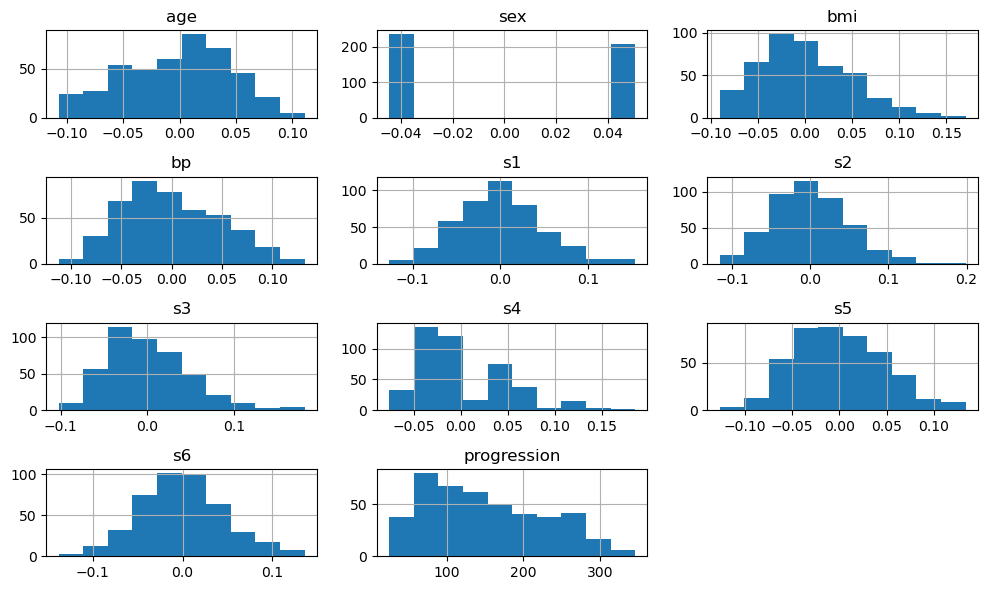

In [39]:
df.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [40]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


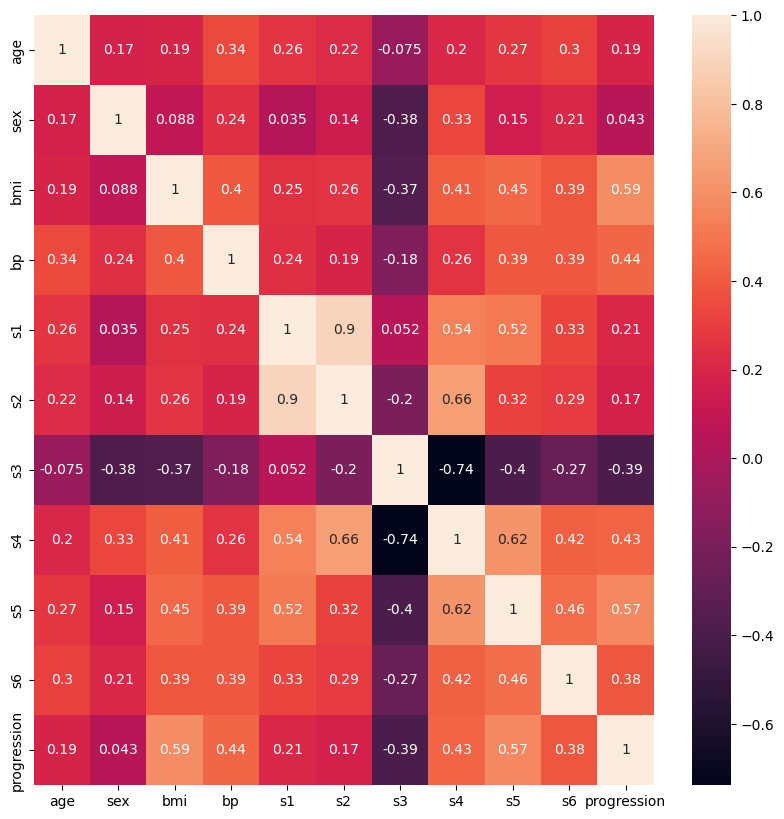

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

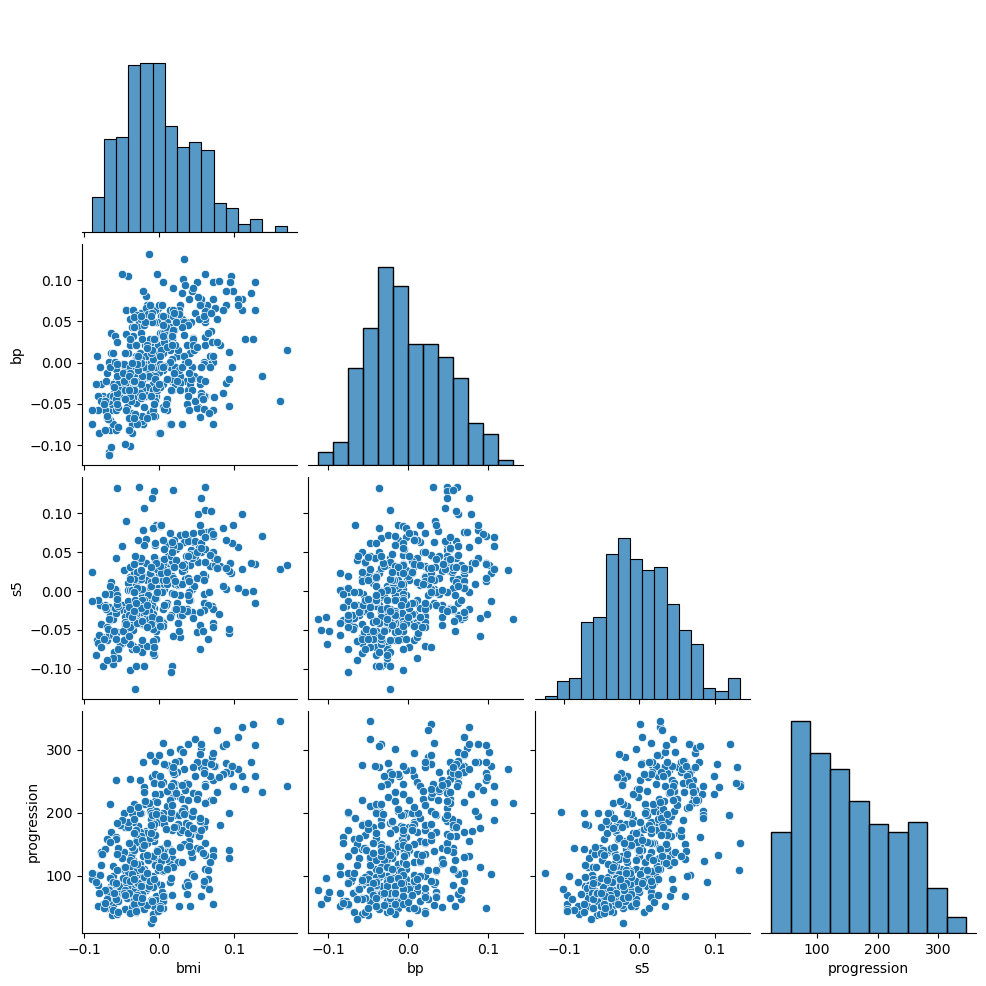

In [48]:
columns = ['bmi', 'bp', 's5', 'progression']
subset_df = df[columns]
sns.pairplot(subset_df, corner=True)
plt.show()

In [43]:
X=df.drop('progression',axis=1)
y=df['progression']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Part 2 - model training

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

Train linear regression model on training set, print rmse on training set 

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE on training set:", rmse_train)

RMSE on training set: 53.558843367230935


In [62]:
#cross validation for linear regression
model = LinearRegression()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

mean_rmse = sqrt(-(cv_scores.mean()))
std_rmse = cv_scores.std()
print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

Mean RMSE: 56.062601682652264
Standard Deviation of RMSE: 355.46681369850506


impliment cross val score on decision tree regressor on training set, print out root mean and sd of cross validation scores

In [63]:
model = DecisionTreeRegressor()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

mean_rmse = sqrt(-(cv_scores.mean()))
std_rmse = cv_scores.std()
print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

Mean RMSE: 79.58991119345905
Standard Deviation of RMSE: 340.29598875976103


impliment cross val score on random forest regressor on training set, print out root mean and sd of cross validation scores

In [64]:
model = RandomForestRegressor()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

mean_rmse = sqrt(-(cv_scores.mean()))
std_rmse = cv_scores.std()
print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

Mean RMSE: 58.02584977827508
Standard Deviation of RMSE: 534.8221498418251


best performing model: linear regression seems to perform the best.  The random forest model has a similar mean RMSE when cross validating but its scores have a much higher standard deviation.

## Part 3 - model tuning

In [67]:
from sklearn.model_selection import GridSearchCV

Print out the parameters of your randomforest model. Do a grid search cross-validation with the following values:
n_estimators: 3,10,30 and max_features: 2,4,6,8, as well as the following experiment: bootstrap: False, n_estimators: 3,10 and max_features: 2,3,4

In [66]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
model = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [3, 10, 30],
    'max_features': [2, 4, 6, 8]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

Print out the best parameters and the best performing model based on this gridsearch.

In [69]:
best_params1 = grid_search.best_params_
best_score1 = -grid_search.best_score_
best_model1 = grid_search.best_estimator_
results1 = grid_search.cv_results_

print("Best Parameters:", best_params1)
print("Best Model:", best_model1)

Best Parameters: {'max_features': 4, 'n_estimators': 30}
Best Model: RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)


Using the cv_results dictionary, print out the rmse of each feature combination for comparison

In [70]:
for mean_score, params in zip(results1['mean_test_score'], results1['params']):
    rmse = sqrt(-mean_score)
    print("Feature Combination:", params)
    print("RMSE:", rmse)
    print()

Feature Combination: {'max_features': 2, 'n_estimators': 3}
RMSE: 68.22509849304959

Feature Combination: {'max_features': 2, 'n_estimators': 10}
RMSE: 62.18413662249328

Feature Combination: {'max_features': 2, 'n_estimators': 30}
RMSE: 60.01374984637889

Feature Combination: {'max_features': 4, 'n_estimators': 3}
RMSE: 64.00409712600997

Feature Combination: {'max_features': 4, 'n_estimators': 10}
RMSE: 60.03785886742053

Feature Combination: {'max_features': 4, 'n_estimators': 30}
RMSE: 58.60379513290442

Feature Combination: {'max_features': 6, 'n_estimators': 3}
RMSE: 65.67786393348364

Feature Combination: {'max_features': 6, 'n_estimators': 10}
RMSE: 61.770707001464416

Feature Combination: {'max_features': 6, 'n_estimators': 30}
RMSE: 59.07097596098849

Feature Combination: {'max_features': 8, 'n_estimators': 3}
RMSE: 66.11809881780495

Feature Combination: {'max_features': 8, 'n_estimators': 10}
RMSE: 61.89644120466714

Feature Combination: {'max_features': 8, 'n_estimators': 

print out the feature importances of the best performing gridsearch model.

In [71]:
feature_importances1 = best_model1.feature_importances_
feature_names = X_train.columns
for feature_name, importance in zip(feature_names, feature_importances1):
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: age, Importance: 0.05908923786588064
Feature: sex, Importance: 0.009463620777768822
Feature: bmi, Importance: 0.30517819270397956
Feature: bp, Importance: 0.11165754944907068
Feature: s1, Importance: 0.06238816853611521
Feature: s2, Importance: 0.06849486975634633
Feature: s3, Importance: 0.0854901286796032
Feature: s4, Importance: 0.064198732447045
Feature: s5, Importance: 0.16999085908790595
Feature: s6, Importance: 0.06404864069628456


Doing the same for the other param grid mentioned

In [72]:
model = RandomForestRegressor(random_state=42)


param_grid = {
    'bootstrap':[False],
    'n_estimators': [3, 10],
    'max_features': [2,3, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [False], 'max_features': [2, 3, 4],
                         'n_estimators': [3, 10]},
             scoring='neg_mean_squared_error')

In [73]:
best_params2 = grid_search.best_params_
best_score2 = -grid_search.best_score_
best_model2 = grid_search.best_estimator_
results2 = grid_search.cv_results_

print("Best Parameters:", best_params2)
print("Best Model:", best_model2)

Best Parameters: {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
Best Model: RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=10,
                      random_state=42)


In [74]:
for mean_score, params in zip(results2['mean_test_score'], results2['params']):
    rmse = sqrt(-mean_score)
    print("Feature Combination:", params)
    print("RMSE:", rmse)
    print()

Feature Combination: {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
RMSE: 66.05734919384311

Feature Combination: {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
RMSE: 59.9081286174646

Feature Combination: {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
RMSE: 69.92185613008961

Feature Combination: {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
RMSE: 64.96928843258651

Feature Combination: {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
RMSE: 68.18892958896414

Feature Combination: {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
RMSE: 61.115235936560765



In [75]:
feature_importances2 = best_model2.feature_importances_
for feature_name, importance in zip(feature_names, feature_importances2):
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: age, Importance: 0.0694158377689439
Feature: sex, Importance: 0.012528882215184342
Feature: bmi, Importance: 0.2553316610425949
Feature: bp, Importance: 0.1077555192394429
Feature: s1, Importance: 0.06930648542307749
Feature: s2, Importance: 0.08044936846990489
Feature: s3, Importance: 0.08342799439074733
Feature: s4, Importance: 0.09108427601543241
Feature: s5, Importance: 0.1520282816868592
Feature: s6, Importance: 0.07867169374781266


Describe how it compares with the correlation matrix we
implemented earlier-- The features that showed more correlation with the target seem to have more importance.

## Part 4 - model evaluation

Document the best-performingmodel between the single feature model you trained in Assignment 1, and the models you trained in part 2 and 3 of this assignment. 

In [77]:
#recreating my model from assignment 1
X_train2 = X_train[['bmi']]
X_test2=X_test[['bmi']]

In [78]:
model = LinearRegression()

cv_scores = cross_val_score(model, X_train2, y_train, cv=5, scoring='neg_mean_squared_error')

mean_rmse = sqrt(-(cv_scores.mean()))
std_rmse = cv_scores.std()
print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

Mean RMSE: 62.67617883426696
Standard Deviation of RMSE: 330.4788555073941


The linear regression model with multiple predictors seems to be my best model

Evaluate the best performing model against your test set. Save your model for future use.

In [81]:
import joblib

In [82]:
best_model = LinearRegression()
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)

rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE on test set:", rmse_test)

RMSE on test set: 53.85344583676593


In [83]:
model_filepath = 'assignment2_model.pkl'
joblib.dump(best_model, model_filepath)

['assignment2_model.pkl']